# PPM reconstruction

PPMpy provides modules that support a finite-volume discretization on a 1D grid and the ability
to reconstruct the cell-average data as parabolas, following the procedure in the original PPM paper ([Colella & Woodward 1984](https://crd.lbl.gov/assets/pubs_presos/AMCS/ANAG/A141984.pdf)).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

`FVGrid` provides a simple 1D finite-volume grid class.  It provides the coordinates for the cells
and can create a scratch array defined on the grid.  It also knows how to fill ghost cells and
compute the norm of the data on the grid.  Finally, it includes some methods that allow us to plot the grid.

In [1]:
from ppmpy import FVGrid

An example grid with 4 cells + 3 ghost cells

In [2]:
g = FVGrid(4, 3)

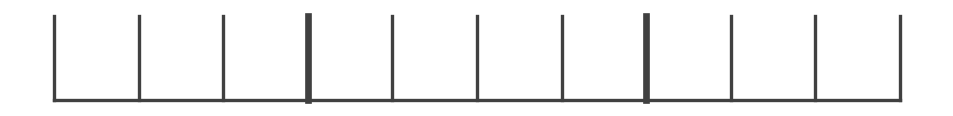

In [3]:
fig, ax = g.draw()

Let's create data on the grid (including the ghost cells) and visualize the PPM reconstruction.

In [6]:
a = g.scratch_array()
a[:] = [0.3, 1.0, 0.9, 0.8, 0.25, 0.1, 0.5, 0.55, 0.25, 0.1]
a

array([0.3 , 1.  , 0.9 , 0.8 , 0.25, 0.1 , 0.5 , 0.55, 0.25, 0.1 ])

`PPMInterpolant` manages the PPM reconstruction of the data.

In [7]:
from ppmpy import PPMInterpolant

In [9]:
ppm = PPMInterpolant(g, a)
ppm.construct_parabola()

We can now visualize the PPM reconstruction of the data

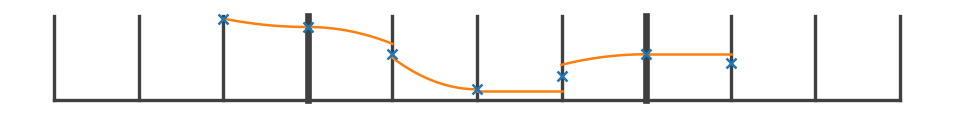

In [10]:
ppm.draw_parabola(ax)
ppm.mark_cubic(ax)
fig

For comparison, we can look at the unlimited case:

In [12]:
ppm = PPMInterpolant(g, a, limit=False)
ppm.construct_parabola()

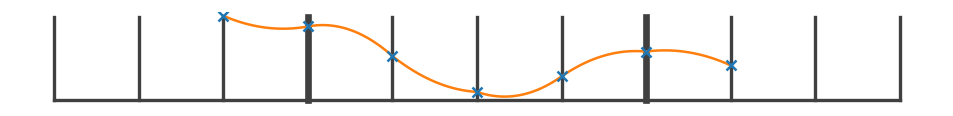

In [14]:
fig2, ax2 = g.draw()
ppm.draw_parabola(ax2)
ppm.mark_cubic(ax2)